The file lesmis.gml contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent
characters as indicated by the labels and edges connect any pair of
characters that appear in the same chapter of the book.  The values on the
edges are the number of such coappearances.  The data on coappearances were
taken from D. E. Knuth, The Stanford GraphBase: A Platform for
Combinatorial Computing, Addison-Wesley, Reading, MA (1993).

In [1]:
import networkx as nx

In [2]:
lesmis = nx.read_gml('lesmis/lesmis.gml')

In [3]:
lesmis

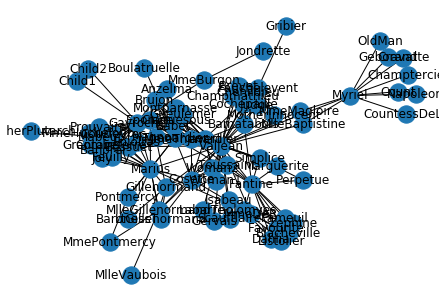

In [31]:
import matplotlib as pl
nx.draw(lesmis,pos=nx.spring_layout(lesmis),with_labels = True)
plt.savefig('labels.png')

{'Myriel': Text(0.6622622421597967, 0.10756067033319898, 'Myriel'),
 'Napoleon': Text(0.9430982959128287, 0.12804542523038798, 'Napoleon'),
 'MlleBaptistine': Text(0.47662330363283384, 0.04412143903668588, 'MlleBaptistine'),
 'MmeMagloire': Text(0.4820863432977829, -0.016313864380889064, 'MmeMagloire'),
 'CountessDeLo': Text(0.9240717133788822, 0.2017289062132979, 'CountessDeLo'),
 'Geborand': Text(0.9320511239439141, 0.051906663740430556, 'Geborand'),
 'Champtercier': Text(0.5893133773492216, 0.2539820030149654, 'Champtercier'),
 'Cravatte': Text(0.6025546186746786, 0.3380597487986711, 'Cravatte'),
 'Count': Text(0.8713038704839179, 0.2673199748466876, 'Count'),
 'OldMan': Text(0.8756129436460294, -0.0391416390210524, 'OldMan'),
 'Labarre': Text(0.3890402403094676, -0.15572388134305748, 'Labarre'),
 'Valjean': Text(0.119655136320717, -0.00416440116738764, 'Valjean'),
 'Marguerite': Text(0.12549185489692374, 0.2837182207193745, 'Marguerite'),
 'MmeDeR': Text(0.23567354389304015, 0.2422

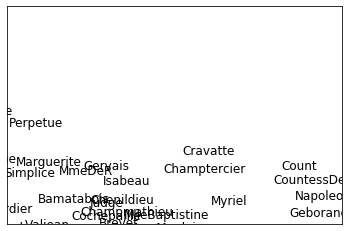

In [5]:
nx.draw_networkx_labels(lesmis,pos=nx.spring_layout(lesmis))

In [6]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
Characters = np.array(list(lesmis.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(lesmis, dtype=np.float64)

In [7]:
Characters

array(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'C

In [8]:
import pandas as pd
pd.DataFrame(Characters[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,Labarre,Valjean,Marguerite,MmeDeR,Isabeau,Gervais,Tholomyes,Listolier,Fameuil,Blacheville


In [9]:
n = len(Characters)
Adj

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 508 stored elements in Compressed Sparse Row format>

In [10]:
Adj.todense()

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

In [13]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

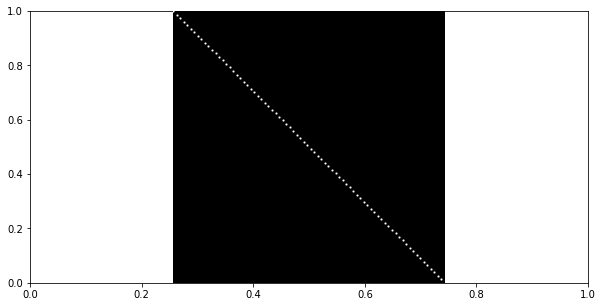

In [14]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

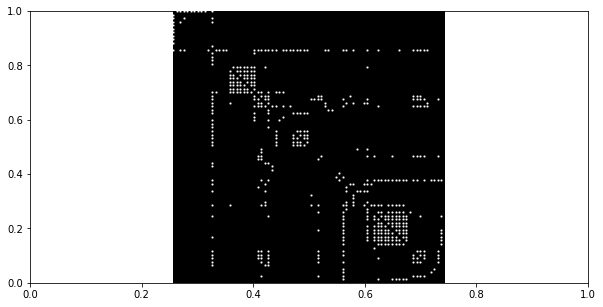

In [15]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

In [16]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too tough!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[01111111110100000000000000000000000000000000000000000000000000000000000000000]] 10
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10010000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10100000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[00000000000100000000000000000000000000000000000000000000000000000000000000000]] 1
[[1011000000101111000000011111110111111110000110001101000100100000100011111

In [17]:
Trans = (Deginv @ Adj).T
Trans

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 508 stored elements in Compressed Sparse Column format>

In [18]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0.1, 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [19]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

In [20]:
in_degrees = np.ravel(Adj.sum(axis=0))

In [21]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(Characters, in_degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 Myriel (10.0) 0.042779281022712105
1 Napoleon (1.0) 0.005584290834982478
2 MlleBaptistine (3.0) 0.010277134629737837
3 MmeMagloire (3.0) 0.010277134629737837
4 CountessDeLo (1.0) 0.005584290834982478
5 Geborand (1.0) 0.005584290834982478
6 Champtercier (1.0) 0.005584290834982478
7 Cravatte (1.0) 0.005584290834982478
8 Count (1.0) 0.005584290834982478
9 OldMan (1.0) 0.005584290834982478
10 Labarre (1.0) 0.003729040931048254
11 Valjean (36.0) 0.07543012163278472
12 Marguerite (2.0) 0.005260327543023242
13 MmeDeR (1.0) 0.0037290409310482536
14 Isabeau (1.0) 0.003729040931048254
15 Gervais (1.0) 0.0037290409310482553
16 Tholomyes (9.0) 0.01564742736848246
17 Listolier (7.0) 0.012618202914107778
18 Fameuil (7.0) 0.01261820291410778
19 Blacheville (7.0) 0.01261820291410778
20 Favourite (7.0) 0.01261820291410778
21 Dahlia (7.0) 0.012618202914107778
22 Zephine (7.0) 0.01261820291410778
23 Fantine (15.0) 0.027022704917205684
24 MmeThenardier (11.0) 0.019501134691061097
25 Thenardier (16.0) 0.

In [22]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('Character-Rank')
    ax.set_xlabel('In-degree (number of Characters)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


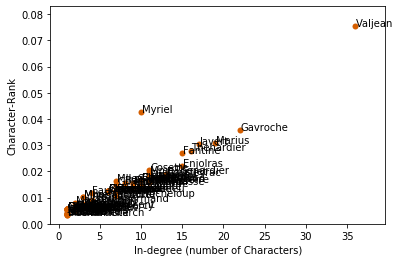

In [23]:
interesting = ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1',
       'Child2', 'Brujon', 'MmeHucheloup']

pagerank_plot(in_degrees, pagerank, Characters, annotations=interesting)

In [24]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

In [25]:
rows = 0
for i in range(48):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 0


In [26]:
for i in range(48):
    print(np.sum((Trans.todense().T)[i]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [27]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

In [28]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [29]:
for i, (s, pr, prp, prp2) in enumerate(zip(Characters, pagerank, pagerank_power, pagerank_power2)):
    print(i, s, pr, prp, prp2, prp/prp2)

0 Myriel 0.042779281022712105 0.04277952082166283 0.042779778273198336 0.9999939819338506
1 Napoleon 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
2 MlleBaptistine 0.010277134629737837 0.010277236946115112 0.010277188158781021 1.0000047471480853
3 MmeMagloire 0.010277134629737837 0.010277236946115112 0.010277188158781021 1.0000047471480853
4 CountessDeLo 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
5 Geborand 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
6 Champtercier 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
7 Cravatte 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
8 Count 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
9 OldMan 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
10 Labarre 0.003729040931048254 0.003729045269846497 0.0037290450875